$r = a(1 - e\times cos E)$

$M = n(t - t_{0})$

$M = E - e\times sin E$

$where\ n = \frac{2\pi}{T}\qquad T = \sqrt{\frac{4\pi^{2}}{Gm}a^{3}}$

In [30]:
import numpy as np

def CalcEA(M,e):

    tol = 10**-8
    Etemp = M
    ratio = 1
    while(np.abs(ratio) > tol):
        f_E = Etemp - e*np.sin(Etemp) - M
        f_Eprime = 1 - e*np.cos(Etemp)
        ratio = f_E/f_Eprime
        if (np.abs(ratio) > tol):
            Etemp = Etemp - ratio
        else:
            E = Etemp
    return E

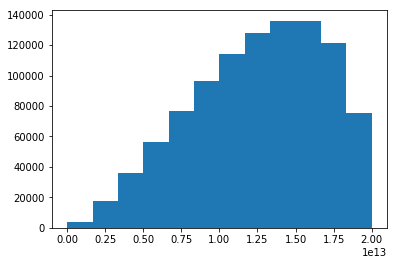

In [143]:
G = 6.67*10**-8       # cm^3 g^-1 s^-1
Ms = 1.5*10**33          # g
a  = 10**13
T = np.sqrt(4*np.pi**2*a**3/(G*Ms))
n = 2*np.pi/T
tt = np.arange(0,T-T/1000,T/1000)
MM = n*tt
nn = np.arange(0.002,1,0.001)
ee = np.sqrt(1-nn)
r = []
for e in ee:
    for M in MM:
        E = CalcEA(M,e)
        rr = a*(1 - e*np.cos(E))
        r.append(rr)

count, bins, ignored = plt.hist(r, 12)
plt.show()

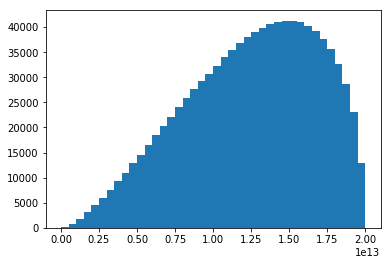

In [144]:
count, bins, ignored = plt.hist(r, 40, range=[0,2*10**13])
plt.show()

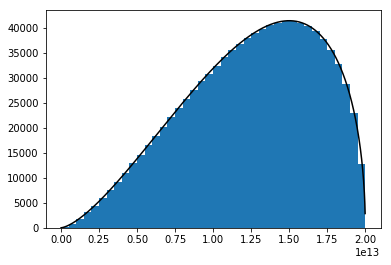

In [136]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.7*10**-8    #erg cm g^-2
a = 10**13        # cm
rr = np.arange(0.001*a, 2*a, a/1000)
M = 1.5*10**33
E0 = -G*M/(2*a)
rho_r = 4*np.pi*np.sqrt(2*(E0+G*M/rr))*rr**2
count, bins, ignored = plt.hist(r, 40, range=[0,2*10**13])
plt.plot(rr, 0.8*rho_r*10**-29, 'k')
plt.show()

$r = f(t)$

$dr = f^{'}(t)dt$

$P(r-r+dr) = 2dt/T$

$dt = dr/f^{'}(t)$

$P(r) = P(r-r+dr)/dr = \frac{2}{f^{'}(t)T}$

$\rho = m\frac{P(r)}{4\pi r^{2}} = \frac{2m}{4\pi r^{2}\dot{r}T}$

$r = \frac{a(1-e^{2})}{1+e*cosf}$

$\dot{r} = \frac{na}{\sqrt{1-e^{2}}}e*sinf$

$n = \frac{2\pi}{T}$

$T = \sqrt{\frac{4\pi^{2}}{G(m_{1}+m_{2})}a^{3}}$

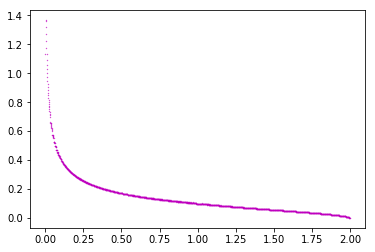

In [2]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.7*10**-8    #erg cm g^-2
a = 10**13
nn = np.arange(0.002,1,0.001)
ee = np.sqrt(1-nn)
#aaa = np.arange(a*(1-e)+a/1000, a*(1+e), a/1000)

m1 = 2*10**33
m2 = 6*10**27
T = np.sqrt(4*np.pi**2*a**3/(G*(m1 + m2)))
n = 2*np.pi/T
r = []
rho = []
for e in ee:
    rr = np.arange(a*(1-e)+10**10, a*(1+e)-10**10, 10**10)
    v_r = n*a*np.sqrt(a**2*e**2-(rr-a)**2)/rr
    rhoo = 2*m1/(4*np.pi*rr**2*v_r*T)
    r.append(rr/a)
    rho.append(rhoo)
    
#r = np.array(r)
#rho = np.array(rho)

e = 0.999
rr = np.arange(a*(1-e)+10**10, a*(1+e)-10**10, 10**10)
v_r = n*a*np.sqrt(a**2*e**2-(rr-a)**2)/rr
rhoo = 2*m1/(4*np.pi*rr**2*v_r*T)
rr = rr/a
for i in range(0,len(r)):
#    print(round(r[i][0],3))
    mask1 = rr >= round(r[i][0],3)
    mask2 = rr <= round(r[i][-1],3)
    mask = mask1*mask2
#    print(r[i],r[i][0],rr[mask][0])
    rhoo[mask] = rhoo[mask]+rho[i]
plt.scatter(rr,rhoo*1000,s=0.1, color = 'm')
plt.show()

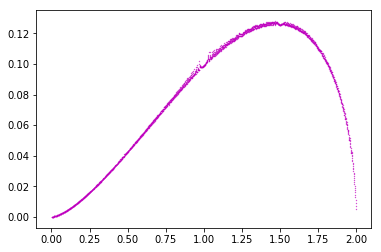

In [156]:
plt.scatter(rr,rhoo*1000*rr**2,s=0.1, color = 'm')
plt.show()

$f(E) = \delta(E-E_{0})$

$E_{0} = \frac{v^{2}}{2} - \frac{GM}{r}$

$\rho(r) = \int f(E) d^{3}\vec{v}$

$\qquad=\int^{\sqrt{2(E_{0}+\frac{GM}{r})}}_{0}f(E)4\pi v d\frac{v^{2}}{2}$

$\qquad=4\pi\int\delta(E-E_{0})\sqrt{2(E+\frac{GM}{r})}dE$

$\qquad=4\pi\sqrt{2(E_{0}+\frac{GM}{r})}$

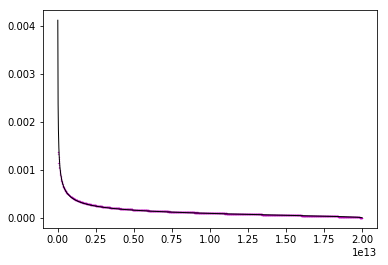

In [16]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.7*10**-8    #erg cm g^-2
a = 10**13        # cm
r = np.arange(0.001*a, 2*a, a/1000)
M = 2*10**33
E0 = -G*M/(2*a)
rho_r = 4*np.pi*np.sqrt(2*(E0+G*M/r))
plt.plot(r, 2*rho_r*10**-12, 'k-', lw=1)
plt.scatter(rr*10**13,rhoo,s=0.1, color='m')
plt.show()
plt.show()

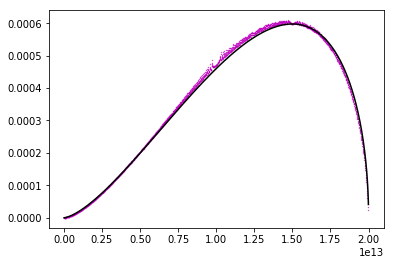

In [158]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.7*10**-8    #erg cm g^-2
a = 10**13        # cm
r = np.arange(0.001*a, 2*a, a/1000)
M = 2*10**33
E0 = -G*M/(2*a)
rho_r = 4*np.pi*np.sqrt(2*(E0+G*M/r))*r**2
plt.plot(r, rho_r*10**-37, 'k-')
plt.scatter(rr*10**13,4.76*rhoo*rr**2,s=0.1, color='m')
plt.show()
plt.show()

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def accx(x,y,M):
    a = -G*M*x/(x**2+y**2)**1.5
    return a

def accy(x,y,M):
    a = -G*M*y/(x**2+y**2)**1.5
    return a

def R_K(x0,vx0,y0,vy0,M0,dt,t0):
    k1,l1 = vx0,vy0
    kk1,ll1 = accx(x0,y0,M0),accy(x0,y0,M0)
    k2,l2 = (vx0+kk1*dt/2),(vy0+ll1*dt/2)
    kk2,ll2 = accx(x0+k1*dt/2,y0+l1*dt/2,M0+0.5*Mh*dt/t0),accy(x0+k1*dt/2,y0+l1*dt/2,M0+0.5*Mh*dt/t0)
    k3,l3 = (vx0+kk2*dt/2),(vy0+ll2*dt/2)
    kk3,ll3 = accx(x0+k2*dt/2,y0+l2*dt/2,M0+0.5*Mh*dt/t0),accy(x0+k2*dt/2,y0+l2*dt/2,M0+0.5*Mh*dt/t0)
    k4,l4 = (vx0+kk3*dt),(vy0+ll3*dt)
    kk4,ll4 = accx(x0+k3*dt,y0+l3*dt,M0+Mh*dt/t0),accy(x0+k3*dt,y0+l3*dt,M0+Mh*dt/t0)
    xn = x0 + (k1+2*k2+2*k3+k4)*dt/6
    vxn = vx0 + (kk1+2*kk2+2*kk3+kk4)*dt/6
    yn = y0 + (l1+2*l2+2*l3+l4)*dt/6
    vyn = vy0 + (ll1+2*ll2+2*ll3+ll4)*dt/6
    Mn = M0+Mh*dt/t0
    NN = [xn,vxn,yn,vyn,Mn]
    return NN
def dyn(coor,num):
#    global G, dt, t0
#    G, dt, t0 = para
    x, vx, y, vy, M = coor
    while(num>0):
        NN = R_K(x[-1],vx[-1],y[-1],vy[-1],M[-1],dt,t0)
        x.append(NN[0])
        vx.append(NN[1])
        y.append(NN[2])
        vy.append(NN[3])
        M.append(NN[4])
        num = num-1
    n = len(x)
    t = np.arange(0,dt*n,dt)
    x, y, vx, vy, M = np.array(x), np.array(y), np.array(vx), np.array(vy), np.array(M)
    array = np.array([[x,y],[vx,vy],[M,t]])
    return array

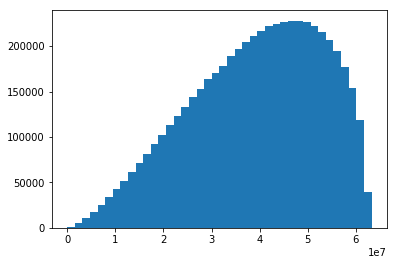

In [150]:
global G, dt, t0, Mh
G = 6.67*10**-8       # cm^3 g^-1 s^-1
Ms = 1.5*10**33          # g
Mh = 0 #Ms
dt = 0.00001      # s
t0 = 10**8
a  = 10**7.5
T = np.sqrt(4*np.pi**2*a**3/(G*Ms))
E0 = -G*Ms/(2*a)
Vms0 = np.sqrt(G*Ms/a)
nn = np.arange(0.02,1,0.002)
ee = np.sqrt(1-nn)
coorx = np.array([])
coory = np.array([])
for e in ee:
    coor0 = [[(1-e)*a], [0], [0], [np.sqrt(2/(1-e) - 1)*Vms0], [Ms]]
    num = T/dt
    res = dyn(coor0,num)
    coorx = np.concatenate((coorx,res[0,0]))
    coory = np.concatenate((coory,res[0,1]))
#    ax.plot(res[0,0],res[0,1],'k-')

rr_orbit = np.sqrt(coorx**2 + coory**2)
#ax.set_xlabel('$x $',fontsize=12)
#ax.set_ylabel('$z $',fontsize=12)
count, bins, ignored = plt.hist(rr_orbit, 40, range=[0,2*10**7.5])
plt.show()

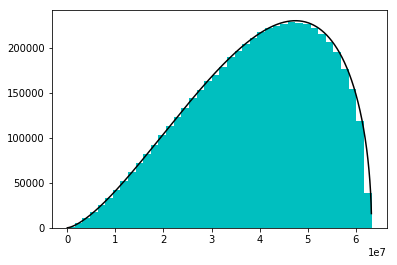

In [153]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.7*10**-8    #erg cm g^-2
a = 10**7.5        # cm
r = np.arange(0.001*a, 2*a, a/1000)
M = 1.5*10**33
E0 = -G*M/(2*a)
rho_r = 4*np.pi*np.sqrt(2*(E0+G*M/r))*r**2
count, bins, ignored = plt.hist(rr_orbit, 40, color = 'c', range=[0,2*10**7.5])
plt.plot(r, 0.79*rho_r*10**-20, 'k')
plt.show()